## **Linear Regression**
We will use Linear regression for predicting house prices



In [14]:
# Lets import required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### **Dataset Preparation**

In [15]:
# Execute this cell for loading dataset in a pandas dataframe


df = pd.read_csv("california_housing_train.csv")


data_df = df.copy()

In [16]:
# Lets have a quick Look at dataset

print("(No of rows, No of Columns) = ",data_df.shape)
data_df.head()

(No of rows, No of Columns) =  (17000, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [17]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


The last step is to make train and test dataset and to create seperate vector for price

In [18]:
arr = np.array(df.drop('median_house_value', axis=1)).T

for i in range(len(arr)):
  arr[i] = (arr[i]-np.mean(arr[i]))/np.std(arr[i], axis=0)

y_train = np.array(df['median_house_value'])  # extract the price column from data
x_train = arr.T

print(x_train.shape,y_train.shape)

(17000, 8) (17000,)


### **Loss and gradient descent**
We will use mean squared error(MSE) as loss

Use the gradient descent algorithm which you learned from tutorials

Your task is to complete the following functions

In [19]:
def loss(y_pred,y_true):
  """
  input:
  y_pred = [array] predicted value of y
  y_true = [array] ground truth

  output:
  mse: [scalar] the MSE loss
  """
  mse = np.sqrt(np.dot((y_pred - y_true), (y_pred - y_true))/y_true.shape[0])# fill code here

  return mse

In [20]:
def y_prediction(x,a,b):
  """
  This function should return predicted value of y = ax+b
  input:
  x: [array] the feature vector of shape (m,n)
  a: [array] weights of shape (n,)
  b: [scalar] bias

  output:
  y_pred: [array] predicted value of y of shape (m,)
  """

  m,n = x.shape
  y_pred = b + np.dot(x, a) # fill code here

  assert(y_pred.shape == (m,))
  return y_pred

In [21]:
def gradient(x,a,b,y_true):
  """
  This function shoud return gradient of loss
  input:
  x: [array] the feature vector of shape (m,n)
  a: [array] weights of shape (n,)
  b: [scalar] bias
  y_true: [array] ground truth of shape (m,)

  output:
  grad: [tuple] a tuple (derivative with respect to a[array of shape(n,)], derivative with respect to b[scalar])
  """
  m,n = x.shape
  yp = y_prediction(x, a, b)# compute y_predicton


  # Compute gradient for weights a as da
  da = 0
  for i in range(m):
    da += (yp[i] - y_true[i]) * x[i]
  da /= m

  # Compute gradients for bias b as db

  db = sum(yp - y_true)/m
  assert(da.shape ==(n,))
  return (da,db)

In [22]:
def gradient_descent(x,y_true,learning_rate=0.01,epochs = 10, a = None,b = 0):
  """
  This function perfroms gradient descent and minimizes loss
  input:
  x: [array] the feature vector of shape (m,n)
  y_true: [array] ground truth of shape (m,)

  output:
  loss: [array] of size (epochs,)
  weights: [tuple] (a,b)
  """
  m,n = x.shape
  if a is None:
    a = np.random.normal(0, 0.5, size = (n,)) * np.sqrt(2/n)
  loss_mse = []                                 # initialize empty list to store loss
  for i in range(epochs):
    # calculate derivative using gradient() function
    (da, db) = gradient(x, a, b, y_true)
    # apply gradient descent now to update a and b
    a -= learning_rate * da
    b -= learning_rate * db
    # calculate loss at this point using loss() function
    l_mse = loss(y_prediction(x, a, b), y_true)
    # Store loss in the list loss_mse
    loss_mse.append(l_mse)

    print("Epoch ",i+1," Completed!","loss = ",l_mse) #print l_mse


  print("Training completed!!")

  assert(a.shape==(n,))

  return (loss_mse,a,b)

### **Training**

In [23]:
epochs = 500       # tweak this!!!
learn_rate = 0.2   # choose learning rate wisely otherwise loss may diverge!!

train_loss,a,b = gradient_descent(x_train, y_train, learn_rate, epochs)

Epoch  1  Completed! loss =  195884.9750420291
Epoch  2  Completed! loss =  163770.51889534827
Epoch  3  Completed! loss =  139303.52923092915
Epoch  4  Completed! loss =  120978.3549240289
Epoch  5  Completed! loss =  107521.4875366389
Epoch  6  Completed! loss =  97839.73411204053
Epoch  7  Completed! loss =  91003.57212987202
Epoch  8  Completed! loss =  86247.15942880553
Epoch  9  Completed! loss =  82966.94537563762
Epoch  10  Completed! loss =  80708.9676438358
Epoch  11  Completed! loss =  79145.63829314437
Epoch  12  Completed! loss =  78048.24145845314
Epoch  13  Completed! loss =  77260.94254745642
Epoch  14  Completed! loss =  76679.36121313772
Epoch  15  Completed! loss =  76234.37255226163
Epoch  16  Completed! loss =  75880.52585141986
Epoch  17  Completed! loss =  75588.05830655502
Epoch  18  Completed! loss =  75337.51469473891
Epoch  19  Completed! loss =  75116.17651818544
Epoch  20  Completed! loss =  74915.71452272327
Epoch  21  Completed! loss =  74730.65462108288


### **Evaluation and Visualization**
Lets plot how loss varies with epochs


Loss on test data =  69464.44041807417


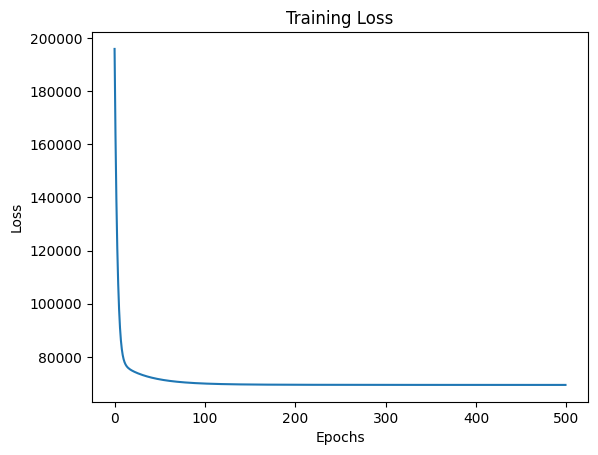

In [24]:
test_df = pd.read_csv("california_housing_train.csv")

arr = np.array(test_df.drop('median_house_value', axis=1)).T

for i in range(len(arr)):
  arr[i] = (arr[i]-np.mean(arr[i]))/np.std(arr[i], axis=0)

y_test = np.array(test_df['median_house_value'])                                                                                                            # extract the price column from data

x_test = arr.T
y_pred = y_prediction(x_test, a, b)
test_loss = loss(y_test, y_pred)#fill code to compute loss between your predictions and True values

print("Loss on test data = ",test_loss)

# Visualization of loss
plt.plot([i for i in range(epochs)], train_loss)                   # plot loss versus epochs
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

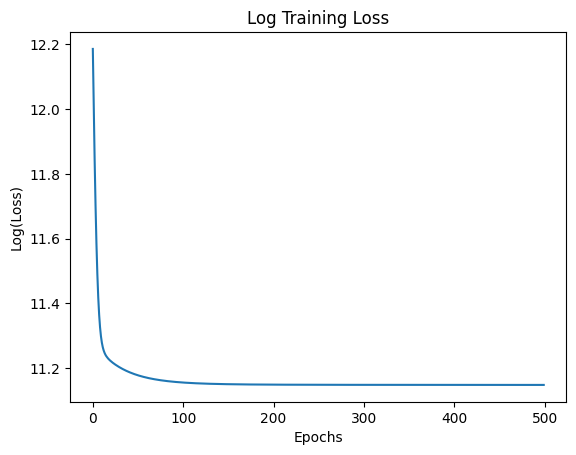

In [25]:
log_tr_loss = []
for loss in train_loss:
  log_tr_loss.append(np.log(loss))
plt.plot([i for i in range(epochs)], log_tr_loss)                   # plot loss versus epochs
plt.title("Log Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Log(Loss)")
plt.show()

That's it you have completed the assignment !!

We hope that you learned something from this exercise
